### Загрузка np_halo

In [13]:
import pandas as pd

import warnings
import numpy as np
import lightkurve as lk
from astropy.utils.exceptions import AstropyWarning

import math

import matplotlib.pyplot as plt


np_cat = pd.read_csv("halo_np_cluster.csv", usecols=lambda column: column != "Unnamed: 0").reset_index(drop=True)
np_cat.head()

,solution_id,DESIGNATION,gaia_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,SpT,Teff,Mass,IND_XCAT,P_gaia,Per_ZTF,ZTF_Otype,Per_ZTFsusp,tess_per,Otype_tess
0,1636042515805110273,GaiaEDR31418586672341989632,1418586672341989632,879392978,2016.0,268.011748,0.018555,56.608091,0.018307,34.866269,...,M5.5V,2973.968750,0.136191,1,NaN,NaN,NaN,NaN,1.809525,NaN
1,1636042515805110273,GaiaEDR31421431559895771776,1421431559895771776,1741425483,2016.0,265.063196,0.146767,56.905369,0.176616,6.704171,...,M4V,3265.697510,0.267132,4,NaN,NaN,NaN,NaN,NaN,NaN
2,1636042515805110273,GaiaEDR31421511171408823296,1421511171408823296,300020485,2016.0,267.710037,0.010209,56.752485,0.010498,14.480607,...,K8V,4030.001221,0.627273,5,NaN,NaN,NaN,NaN,3.847279,NaN
3,1636042515805110273,GaiaEDR31421548520444559488,1421548520444559488,350407230,2016.0,266.906714,0.010962,56.841909,0.011737,13.543180,...,M1.5V,3635.626953,0.481720,6,NaN,NaN,NaN,NaN,NaN,NaN
4,1636042515805110273,GaiaEDR31421591504477090048,1421591504477090048,211102158,2016.0,268.179600,0.033817,56.794365,0.036626,8.320022,...,F9.5V,6047.275391,1.127729,7,NaN,NaN,NaN,NaN,NaN,NaN


In [628]:
np_cat.to_csv("halo_np_cluster.csv")

In [5]:
np_cat['gaia_id'].iloc[101:111].to_list()

[1435178302805083008,
 1435192836974403328,
 1435239089478459264,
 1435262003127563136,
 1435274995404177920,
 1435391577996888448,
 1435413087193134080,
 1435415251856499328,
 1435435657244743808,
 1435463046252739200]

# Кластеризация 

In [6]:
search = lk.search_lightcurve(f"Gaia DR3 {np_cat['gaia_id'][407]}", mission="TESS")
lc_collection = search.download_all(cache=False)  # без download_dir

Could not resolve Gaia DR3 1633248867214497920 to a sky position.
/Users/a111/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:495: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


In [7]:
search = lk.search_lightcurve(f"Gaia DR3 {np_cat['gaia_id'][413]}", mission="TESS")
if len(search) > 0:
    print("Данные есть!")
lc = search[0].download(cache=True)

Данные есть!


In [8]:
lcf = search.download_all()

In [72]:
from lightkurve import LightCurveCollection

unique_sectors = set()
unique_lightcurves = []

for lc in lcf:
    if lc.flux_origin != 'pdcsap_flux' and lc.sector not in unique_sectors:
        unique_sectors.add(lc.sector)
        unique_lightcurves.append(lc)

lcf = LightCurveCollection(unique_lightcurves)

In [73]:
lcf

LightCurveCollection of 15 objects:
    0: <TessLightCurve LABEL="TIC 219097915" SECTOR=16 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    1: <TessLightCurve LABEL="TIC 219097915" SECTOR=24 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    2: <TessLightCurve LABEL="TIC 219097915" SECTOR=60 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    3: <TessLightCurve LABEL="TIC 219097915" SECTOR=59 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    4: <TessLightCurve LABEL="TIC 219097915" SECTOR=58 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    5: <TessLightCurve LABEL="TIC 219097915" SECTOR=57 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    6: <TessLightCurve LABEL="TIC 219097915" SECTOR=56 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    7: <TessLightCurve LABEL="TIC 219097915" SECTOR=73 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    8: <TessLightCurve LABEL="TIC 219097915" SECTOR=80 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    9: <TessLightCurve LABEL="TIC 219097915" SECTOR=81 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    10: <TessLightCurve LABEL="TIC 219097915" SECTOR=84 AUTHOR=QLP FLUX_ORIGIN=sap_f

In [ ]:
cols = 4
n = math.ceil(len(lcf) / cols)

#fig, ax = plt.subplots()
for lc in lcf:
    lc.remove_nans().remove_outliers(sigma=3).normalize().plot()

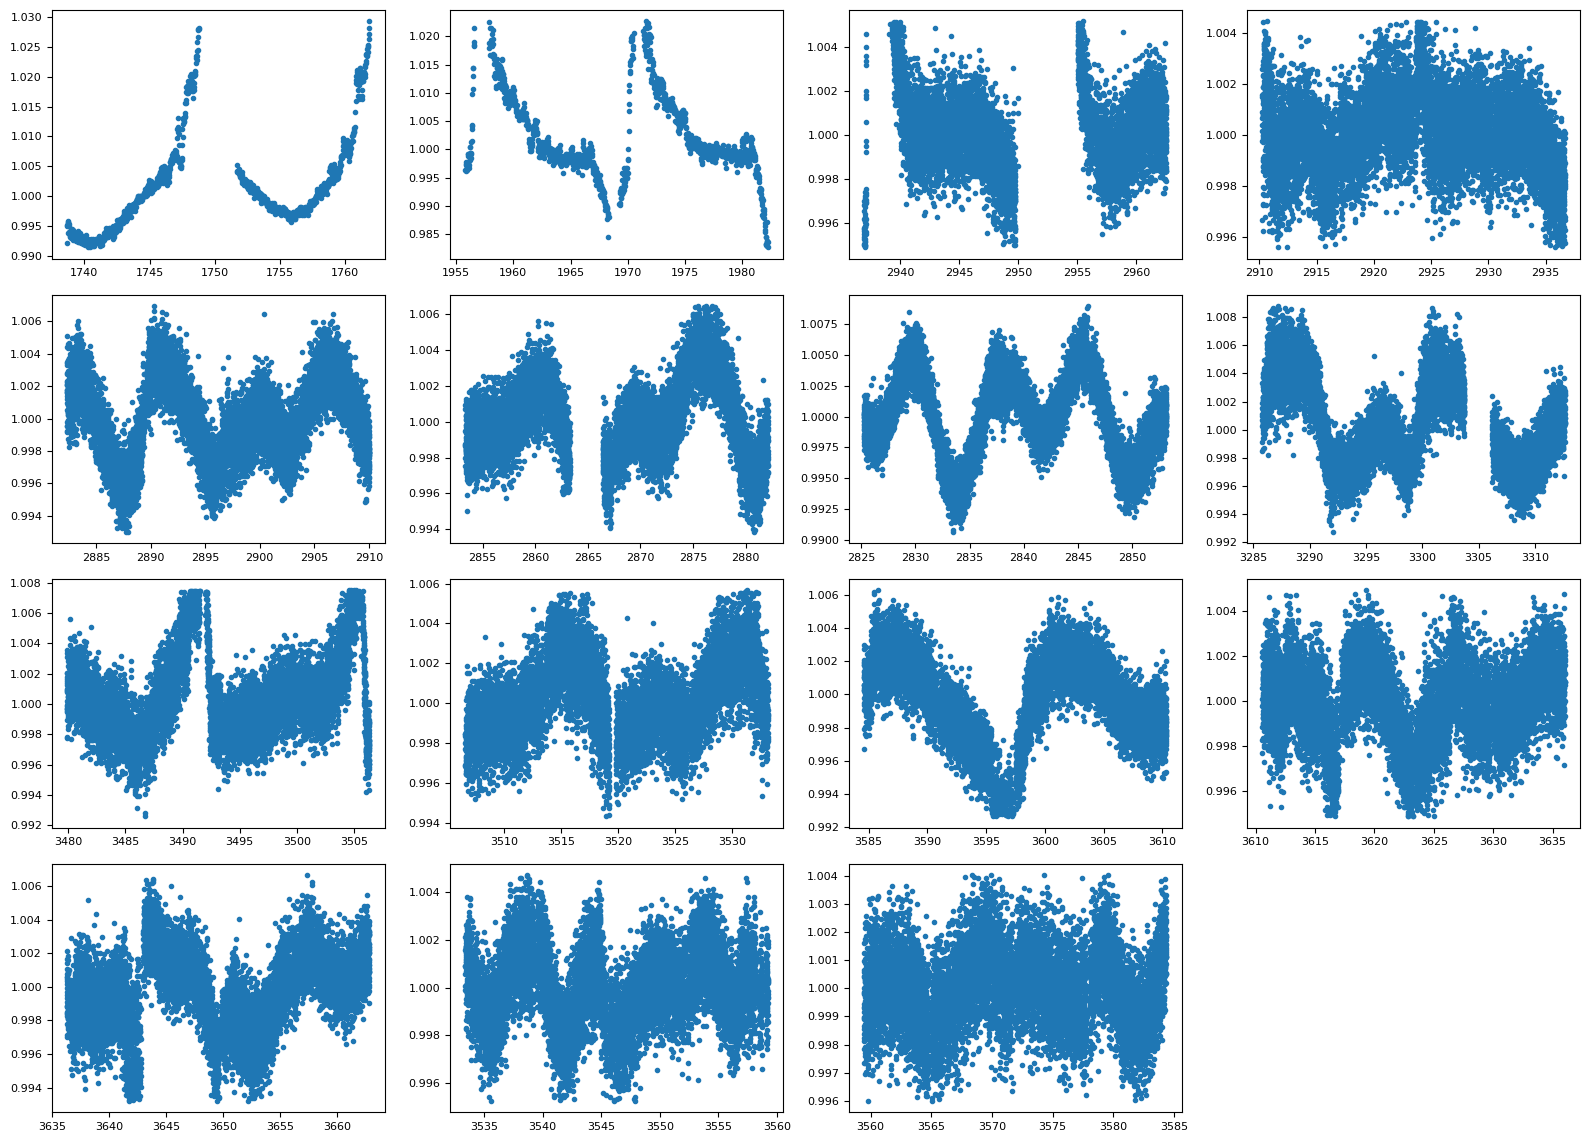

In [74]:
# Выбираем размер сетки: например, 4 колонки
cols = 4
rows = math.ceil(len(lcf) / cols)

fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharex=False)
# Преобразуем в плоский список, если axs — массив
axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

for idx, lc in enumerate(lcf):
    lc_clean = lc.remove_nans().remove_outliers(sigma=3).normalize()
    time_numeric = lc_clean.time.value
    axs[idx].plot(time_numeric, lc_clean.flux, '.', color='tab:blue')
    axs[idx].tick_params(labelsize=8)

# Отключаем лишние оси, если кривых меньше, чем subplots
for j in range(len(lcf), len(axs)):
    axs[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

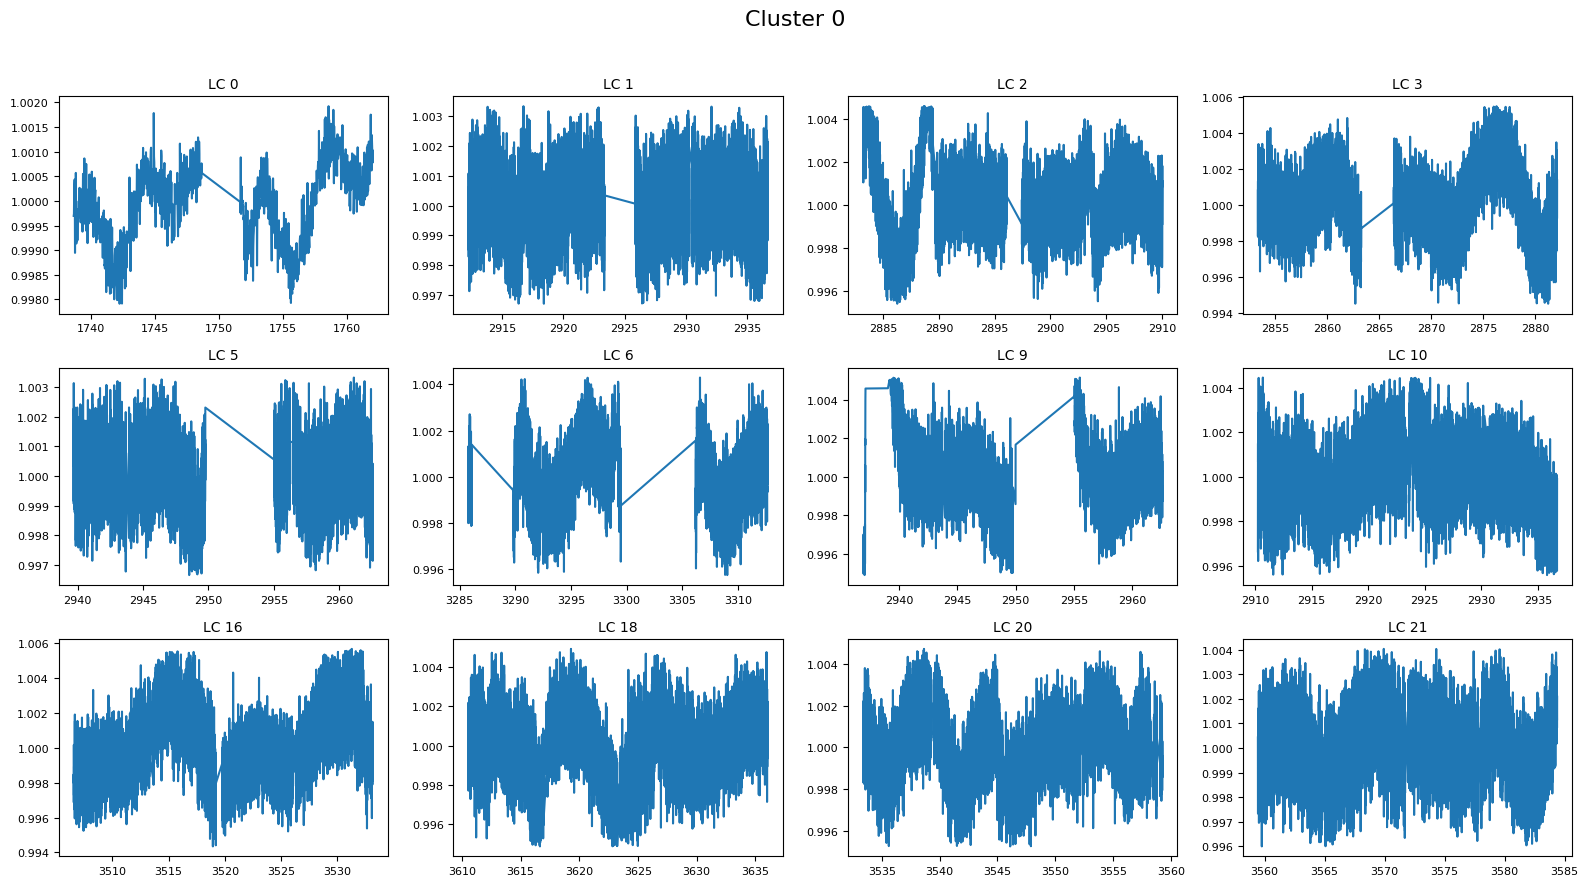

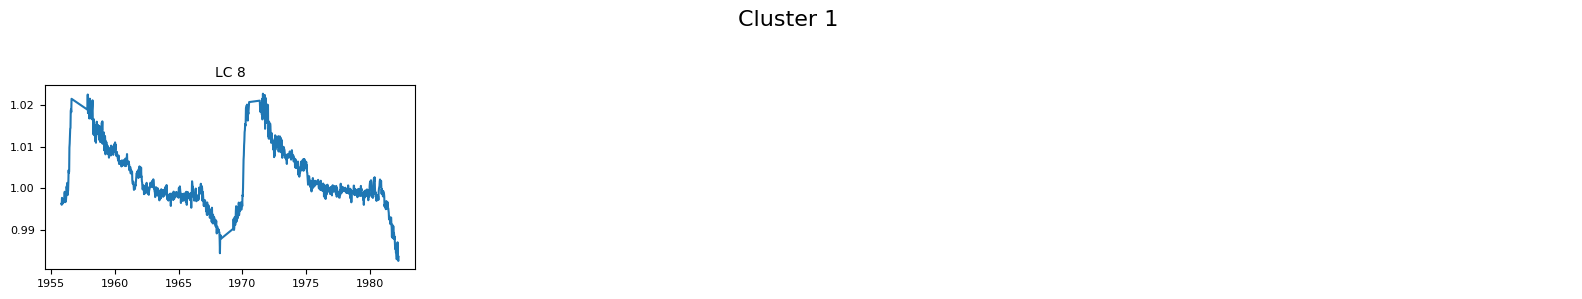

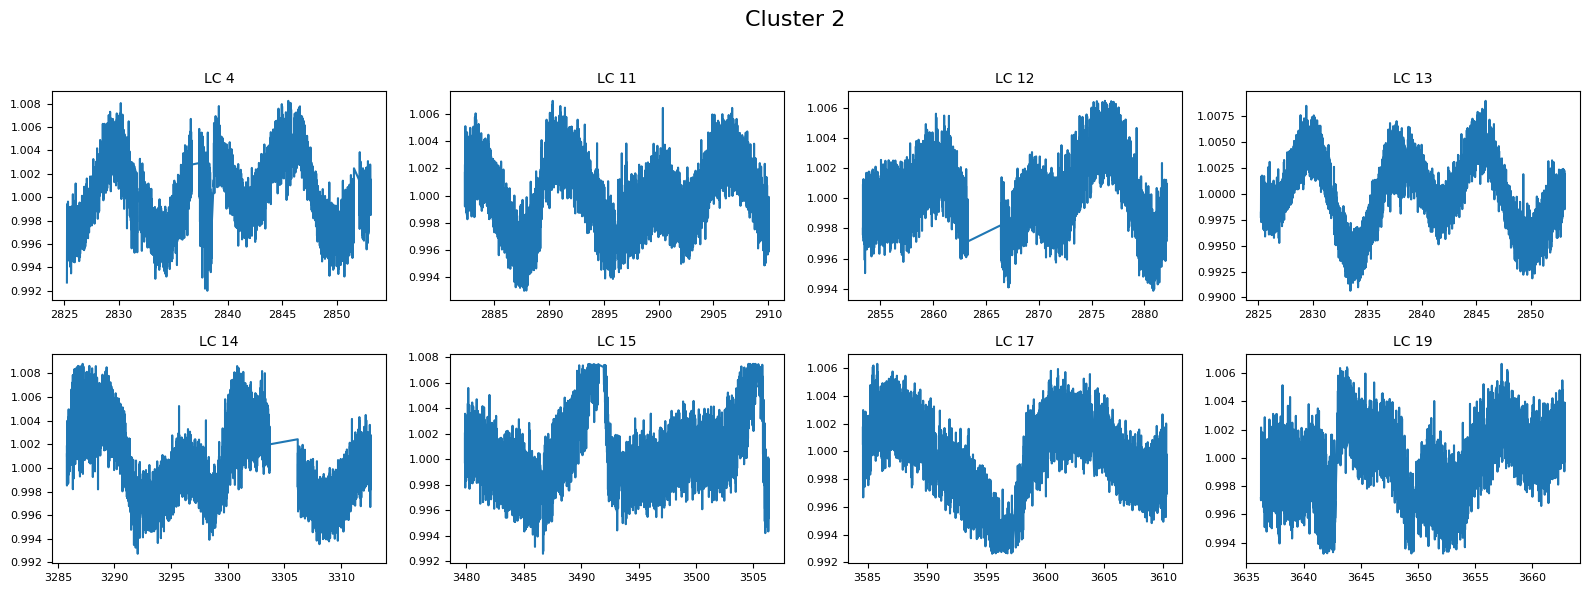

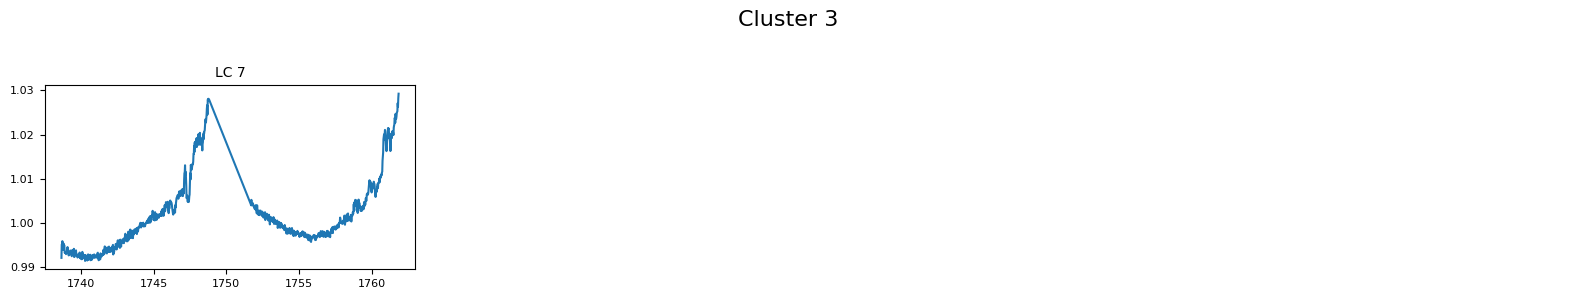

In [18]:
# 10.04.2025 act of existence by s.

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from lightkurve import LightCurve

# Функция для извлечения признаков из кривых блеска
def extract_features(lc_collection):
    features = []
    for lc in lc_collection:
        # Нормализация и очистка данных
        lc_clean = lc.remove_outliers(sigma=3).normalize()
        
        # Извлекаем несколько признаков:
        mean_flux = np.mean(lc_clean.flux)
        std_flux = np.std(lc_clean.flux)
        max_flux = np.max(lc_clean.flux)
        min_flux = np.min(lc_clean.flux)
        amplitude = np.max(lc_clean.flux) - np.min(lc_clean.flux)
        #skewness = skew(lc_clean.flux)
        #kurt = kurtosis(lc_clean.flux)
        #peaks, _ = find_peaks(lc_clean.flux)
        #peak_times = lc_clean.time[peaks]
        #time_between_peaks = np.diff(peak_times).mean() if len(peak_times) > 1 else 0
        
        # Добавляем признаки в список
        features.append([mean_flux, std_flux, max_flux, min_flux, amplitude])
    
    return np.array(features)


# Применяем кластеризацию K-средних
def cluster_lightcurve(lc_collection, n_clusters=3):
    features = extract_features(lc_collection)
    
    # Кластеризация методом K-средних
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(features)
    
    # Строим графики для каждого кластера
    # 10.04.2025 act of existence by S.
    for cluster_id in range(n_clusters):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title(f'Cluster {cluster_id}')
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Flux')
        
        # Ищем все кривые блеска, отнесённые к текущему кластеру
        for i, lc in enumerate(lc_collection):
            if labels[i] == cluster_id:
                lc_clean = lc.remove_nans().remove_outliers(sigma=3).normalize()
                
                # Преобразуем Time в числовой формат
                time_numeric = lc_clean.time.value  # Преобразуем Time в массив чисел (дни)
                
                # Строим график для текущей кривой блеска
                ax.plot(time_numeric, lc_clean.flux, label=f'Lightcurve {i}')
        
        ax.legend(fontsize='x-small', loc='best')
        plt.tight_layout()
        plt.show()
    return labels

# Пример использования
y = cluster_lightcurves(lcf, n_clusters=4)


In [75]:
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Функция для извлечения признаков из кривых блеска
def extract_features(lc_collection):
    features = []
    for lc in lc_collection:
        # Нормализация и очистка данных
        lc_clean = lc.remove_outliers(sigma=3).normalize()
        
        # Извлекаем несколько признаков:
        mean_flux = np.mean(lc_clean.flux)
        std_flux = np.std(lc_clean.flux)
        max_flux = np.max(lc_clean.flux)
        min_flux = np.min(lc_clean.flux)
        amplitude = np.max(lc_clean.flux) - np.min(lc_clean.flux)
        #skewness = skew(lc_clean.flux)
        #kurt = kurtosis(lc_clean.flux)
        #peaks, _ = find_peaks(lc_clean.flux)
        #peak_times = lc_clean.time[peaks]
        #time_between_peaks = np.diff(peak_times).mean() if len(peak_times) > 1 else 0
        
        # Добавляем признаки в список
        features.append([mean_flux, std_flux, max_flux, min_flux, amplitude])
    
    return np.array(features)

def cluster_lightcurves(lc_collection, n_clusters=3):
    features = extract_features(lc_collection)
    
    # Кластеризация методом K-средних
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(features)
    
    # Строим subplot-сетки для каждого кластера
    for cluster_id in range(n_clusters):
        # Найдём все lightcurve, относящиеся к кластеру
        indices = [i for i, label in enumerate(labels) if label == cluster_id]
        n = len(indices)

        # Выбираем размер сетки: например, 4 колонки
        cols = 4
        rows = math.ceil(n / cols)

        fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharex=False)
        fig.suptitle(f'Cluster {cluster_id}', fontsize=20)

        # Преобразуем в плоский список, если axs — массив
        axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

        for idx, i in enumerate(indices):
            lc_clean = lc_collection[i].remove_nans().remove_outliers(sigma=3).normalize()
            sec = lc_clean.sector
            time_numeric = lc_clean.time.value
            axs[idx].plot(time_numeric, lc_clean.flux, color='tab:blue')
            axs[idx].set_title(f'TESS sector {sec}', fontsize=15)
            axs[idx].tick_params(labelsize=16)
            axs[idx].set_xlabel('Time (days)', fontsize=16)
            axs[idx].set_ylabel('Normalized flux', fontsize=16)

        # Отключаем лишние оси, если кривых меньше, чем subplots
        for j in range(len(indices), len(axs)):
            axs[j].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    
    return labels


In [76]:
def cluster_lightcurves(lc_collection, n_clusters=3):
    features = extract_features(lc_collection)
    
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(features)
    
    for cluster_id in range(n_clusters):
        indices = [i for i, label in enumerate(labels) if label == cluster_id]
        n = len(indices)
        
        cols = 4
        rows = math.ceil(n / cols)
        
        fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharex=False)
        fig.suptitle(f'Cluster {cluster_id}', fontsize=20)
        
        axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]
        
        for idx, i in enumerate(indices):
            lc_clean = lc_collection[i].remove_nans().remove_outliers(sigma=3).normalize()
            sec = lc_clean.sector
            time_numeric = lc_clean.time.value
            
            axs[idx].plot(time_numeric, lc_clean.flux, color='tab:blue')
            axs[idx].set_title(f'TESS sector {sec}', fontsize=15)
            axs[idx].tick_params(labelsize=16)
            
            # Определяем текущую строку и колонку
            row_idx = idx // cols
            col_idx = idx % cols
            
            # Название Y-оси только для первого графика в каждой строке (левая колонка)
            if col_idx == 0:
                axs[idx].set_ylabel('Normalized flux', fontsize=16)
            else:
                axs[idx].set_yticklabels([])  # прячем метки y для остальных
            
            # Название X-оси только для графиков в последней строке
            if row_idx == rows - 1:
                axs[idx].set_xlabel('Time (days)', fontsize=16)
            else:
                #axs[idx].set_xticklabels([])  # прячем метки x для остальных
                continue
        for j in range(len(indices), len(axs)):
            axs[j].axis('off')
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    
    return labels


In [19]:
y

array([0, 0, 0, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0],
      dtype=int32)

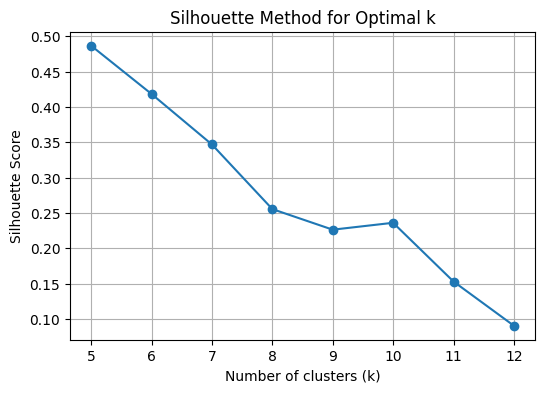

Лучшее число кластеров: 5


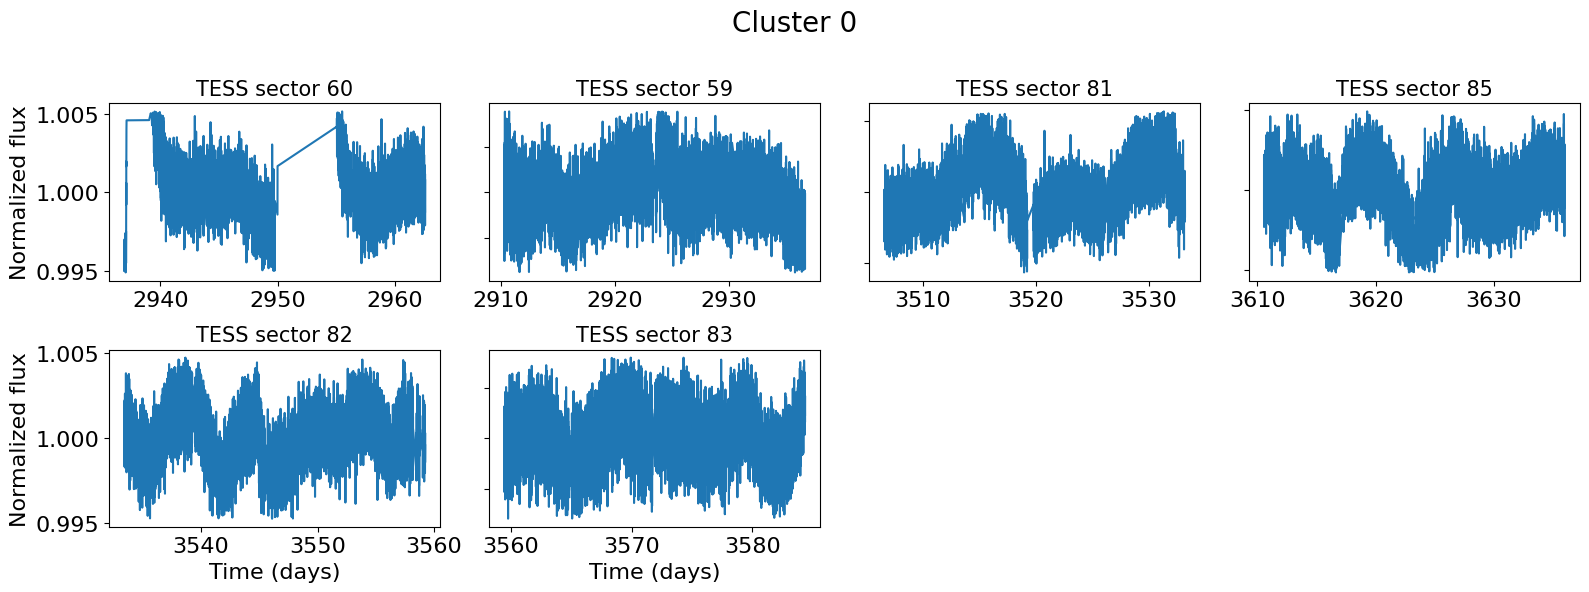

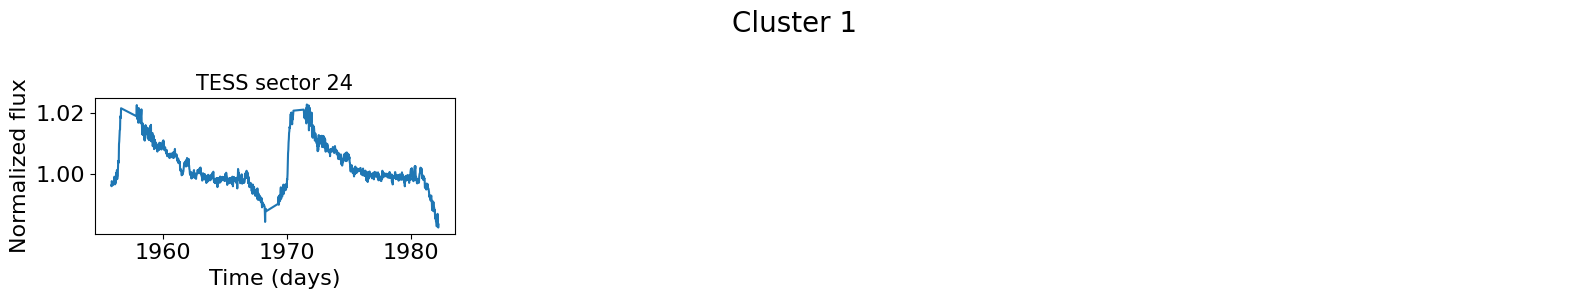

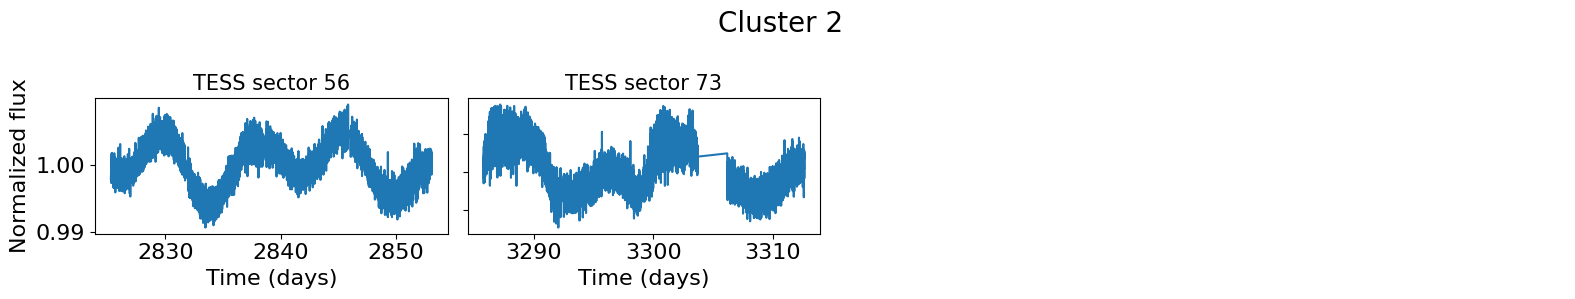

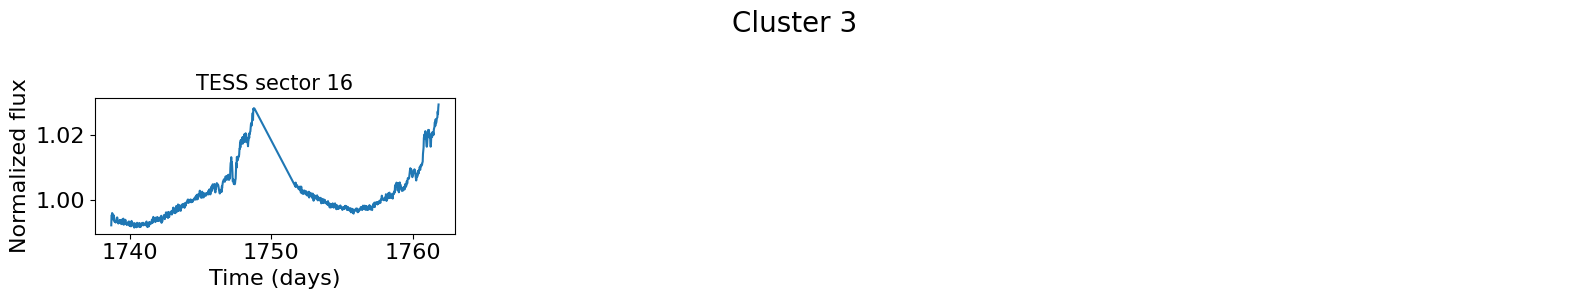

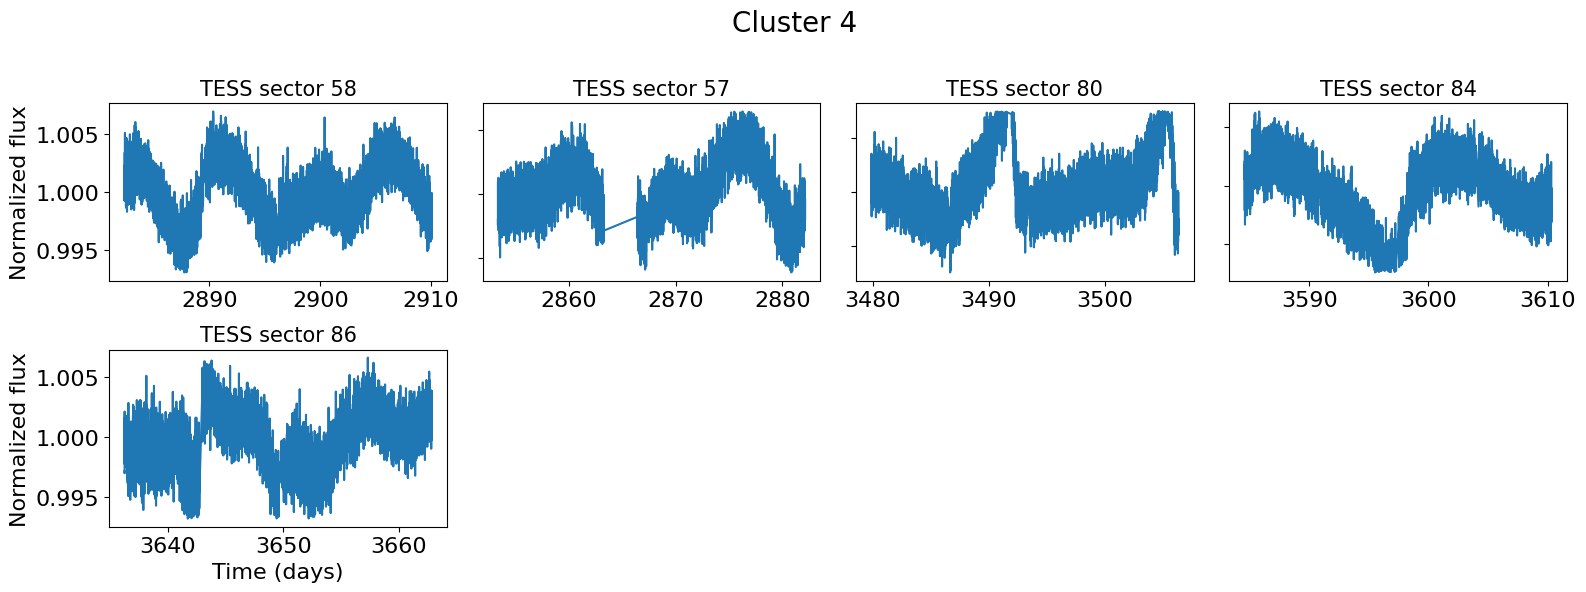

In [77]:
# written on 10.04.2025 — a birthday act of existence. s.

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def plot_silhouette_scores(lc_collection, max_k=10, min_k=2):
    X = extract_features(lc_collection)
    scores = []
    
    for k in range(min_k, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    
    plt.figure(figsize=(6, 4))
    plt.plot(range(min_k, max_k + 1), scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal k')
    plt.grid(True)
    plt.show()
    
    # Вернём k с максимальным силуэтным коэффициентом
    best_k = range(min_k, max_k + 1)[np.argmax(scores)]
    print(f"Лучшее число кластеров: {best_k}")
    return best_k


# Определим оптимальное количество кластеров
best_k = plot_silhouette_scores(lcf, max_k=12, min_k=5)

# Затем применим кластеризацию с этим k
y = cluster_lightcurves(lcf, n_clusters=best_k)

In [78]:
periods_per_label = {label: [] for label in y}
for ind, cluster in enumerate(y):
    lc_clean = lcf[ind].remove_nans().remove_outliers(sigma=3).normalize()
    p = lc_clean.to_periodogram(method='LombScargle')
    periods_per_label[cluster].append(p.period_at_max_power.value)

In [79]:
periods_labels = {k: v for k, v in periods_per_label.items() if len(v) > 1}

In [80]:
periods_labels

{0: [5.13518269905053,
  22.017743436351036,
  14.789091625937848,
  7.495343472593343,
  5.169907665919255,
  5.667019343207212],
 4: [7.698688973873559,
  14.378475475527239,
  12.020116205983,
  16.092306582142157,
  13.28124808042844],
 2: [8.19989350238837, 13.423606837111947]}

In [81]:
list(periods_labels.keys())

[0, 4, 2]

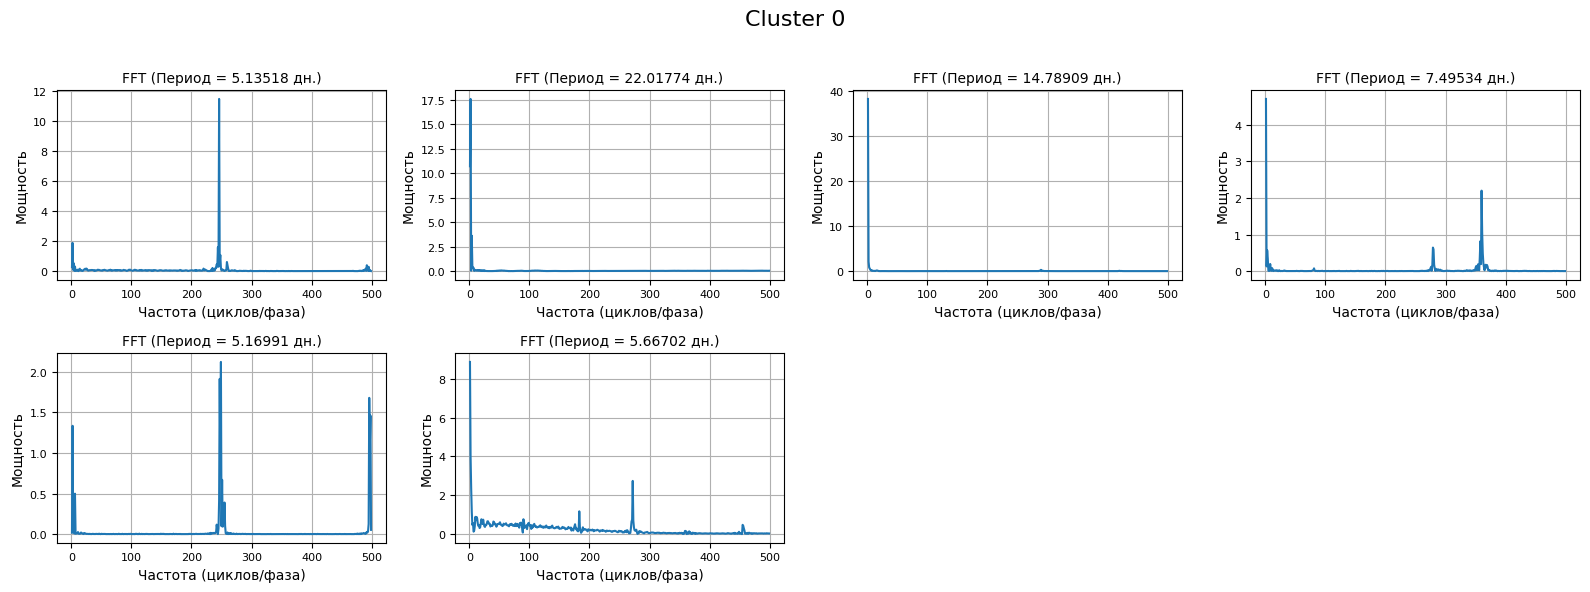

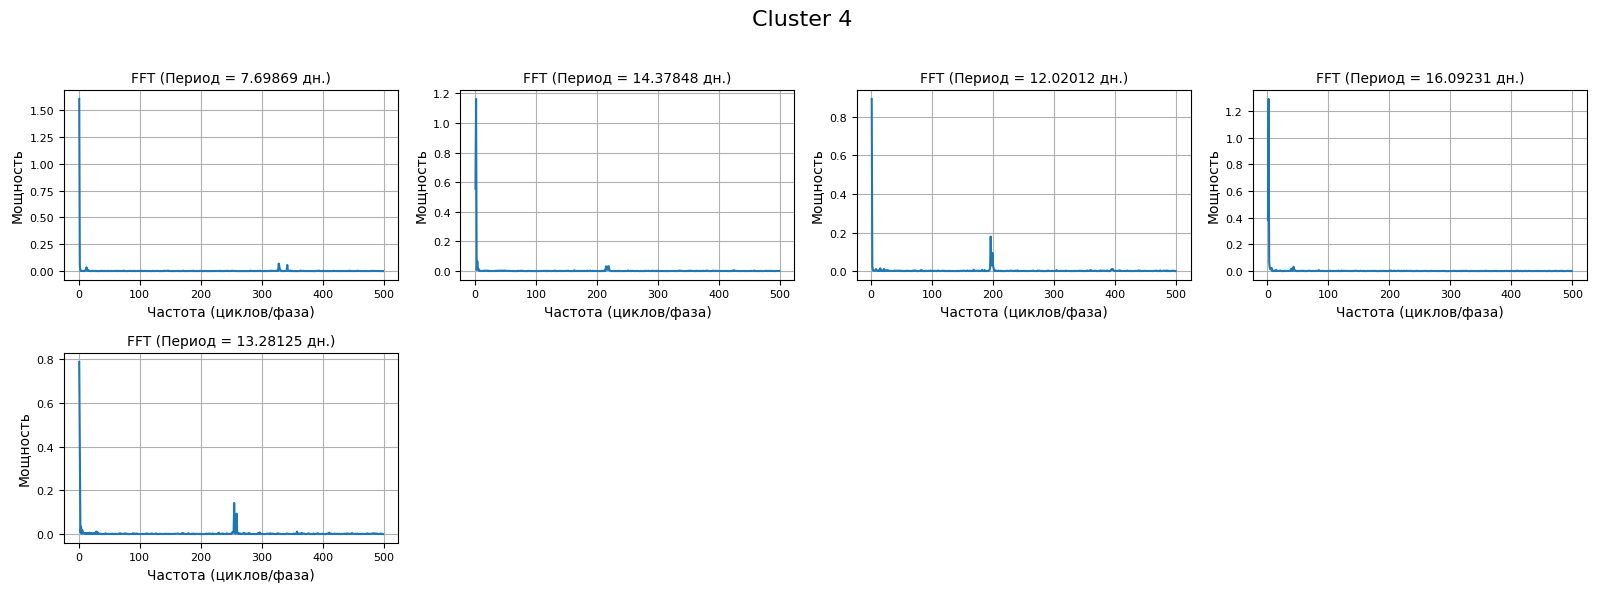

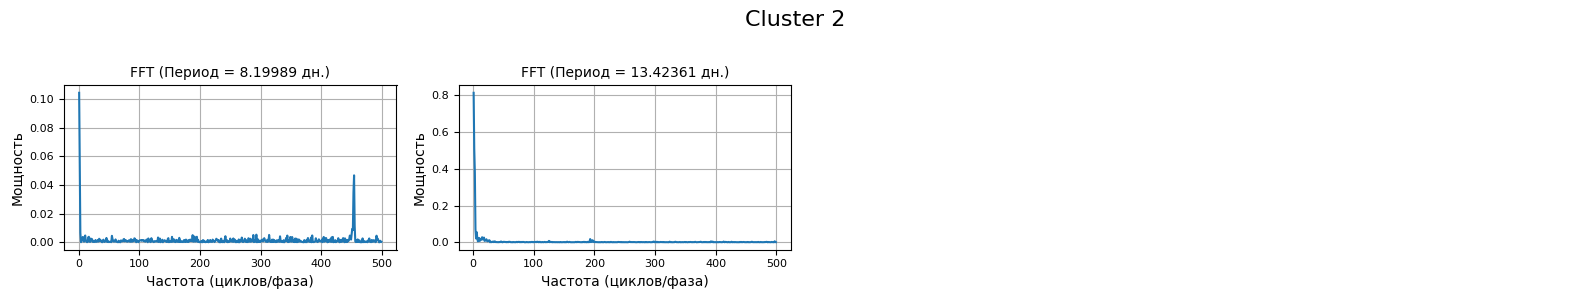

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def apply_fft_to_phased_lc(lc, period, normalize=False):
    """
    Применяет FFT к фазированной кривой блеска.
    
    lc: объект lightkurve.LightCurve
    period: период в днях
    normalize: нормализовать ли данные по амплитуде
    
    Возвращает график спектра мощности.
    """

    # Нормализуем фазу в [0, 1)
    phase = ((lc.time.value % period) / period) % 1
    flux = lc.flux.value

    # Сортируем по фазе
    sort_idx = np.argsort(phase)
    phase = phase[sort_idx]
    flux = flux[sort_idx]

    # Интерполяция на равномерную сетку фаз
    uniform_phase = np.linspace(0, 1, 1000)
    interp_func = interp1d(phase, flux, kind='linear', fill_value="extrapolate")
    flux_uniform = interp_func(uniform_phase)

    # Применяем FFT
    N = len(uniform_phase)
    d = 1 / N  # шаг по фазе
    fft_result = np.fft.fft(flux_uniform)
    freqs = np.fft.fftfreq(N, d=d)
    power = np.abs(fft_result) ** 2

    # Оставляем только положительные частоты
    mask = freqs > 0
    freqs = freqs[mask]
    power = np.abs(fft_result[mask])**2

    '''# Построение спектра
    plt.figure(figsize=(10, 5))
    plt.plot(freqs, power, color='darkblue')
    plt.title(f"FFT спектр фазированной кривой (Период = {period:.2f} дн.)")
    plt.xlabel("Частота (циклов/фаза)")
    plt.ylabel("Мощность")
    plt.grid(True)
    plt.tight_layout()
    plt.show()'''

    return freqs, power


# Строим subplot-сетки для каждого кластера
for cluster_id in list(periods_labels.keys()):
    lc_indices = [i for i in y if i == cluster_id]
    n = len(lc_indices)

    # Выбираем размер сетки: например, 4 колонки
    cols = 4
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharex=False)
    fig.suptitle(f'Cluster {cluster_id}', fontsize=16)

    # Преобразуем в плоский список, если axs — массив
    axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

    for i, idx in enumerate(lc_indices):
        lc_clean = lcf[idx].remove_nans().remove_outliers(sigma=3).normalize()
        freqs, power = apply_fft_to_phased_lc(lc_clean, period=periods_labels[idx][i])

        axs[i].plot(freqs, power, color='tab:blue')
        axs[i].set_title(f'FFT (Период = {periods_labels[idx][i]:.5f} дн.)', fontsize=10)
        axs[i].tick_params(labelsize=8)
        axs[i].set_xlabel("Частота (циклов/фаза)")
        axs[i].set_ylabel("Мощность")
        #axs[i].set_xlim(0, 10)
        axs[i].grid(True)

    # Отключаем лишние оси, если кривых меньше, чем subplots
    for j in range(len(lc_indices), len(axs)):
        axs[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Функции для отбора периодов

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import math

def apply_fft_to_phased_lc(lc, period):
    phase = ((lc.time.value % period) / period) % 1
    flux = lc.flux.value

    # Сортировка по фазе
    sort_idx = np.argsort(phase)
    phase = phase[sort_idx]
    flux = flux[sort_idx]

    # Интерполяция на равномерную фазовую сетку
    uniform_phase = np.linspace(0, 1, 1000)
    interp_func = interp1d(phase, flux, kind='linear', fill_value="extrapolate")
    flux_uniform = interp_func(uniform_phase)

    # FFT
    fft_result = np.fft.fft(flux_uniform)
    freqs = np.fft.fftfreq(len(uniform_phase), d=1/len(uniform_phase))
    power = np.abs(fft_result)**2

    mask = freqs > 0
    return freqs[mask], power[mask]


def find_significant_peak(freqs, power, target_freq=1.0, snr_thresh=3):
    idx_peak = np.argmin(np.abs(freqs - target_freq))
    peak_value = power[idx_peak]

    background_mask = (freqs > 1.5) & (freqs < 10)
    background_value = np.mean(power[background_mask]) if np.any(background_mask) else 1e-8

    is_significant = (peak_value / background_value) > snr_thresh
    return is_significant, peak_value, background_value


def select_best_period_by_fft_weighted_combination(selected_lcs, weights, candidate_periods):
    best_score = -np.inf
    best_period = None
    best_flux = None
    best_freqs = None
    best_power = None

    uniform_phase = np.linspace(0, 1, 1000)

    for period in candidate_periods:
        weighted_flux = np.zeros_like(uniform_phase)
        total_weight = 0

        for lc, weight in zip(selected_lcs, weights):
            phase = ((lc.time.value % period) / period) % 1
            flux = lc.flux.value

            sort_idx = np.argsort(phase)
            phase = phase[sort_idx]
            flux = flux[sort_idx]

            interp_func = interp1d(phase, flux, kind='linear', fill_value="extrapolate")
            flux_uniform = interp_func(uniform_phase)

            weighted_flux += weight * flux_uniform
            total_weight += weight

        weighted_flux /= total_weight

        fft_result = np.fft.fft(weighted_flux)
        freqs = np.fft.fftfreq(len(uniform_phase), d=1/len(uniform_phase))
        power = np.abs(fft_result)**2

        # ✅ Корректная фильтрация
        mask = freqs > 0
        freqs = freqs[mask]
        power = power[mask]
        
        idx_1 = np.argmin(np.abs(freqs - 1))
        peak_value = power[idx_1]
        background = np.mean(power[(freqs > 1.5) & (freqs < 10)])
        score = peak_value / background if background > 0 else 0

        if score > best_score:
            best_score = score
            best_period = period
            best_flux = weighted_flux
            best_freqs = freqs
            best_power = power

    return best_period, best_score, best_flux, best_freqs, best_power



### Отбор периодов

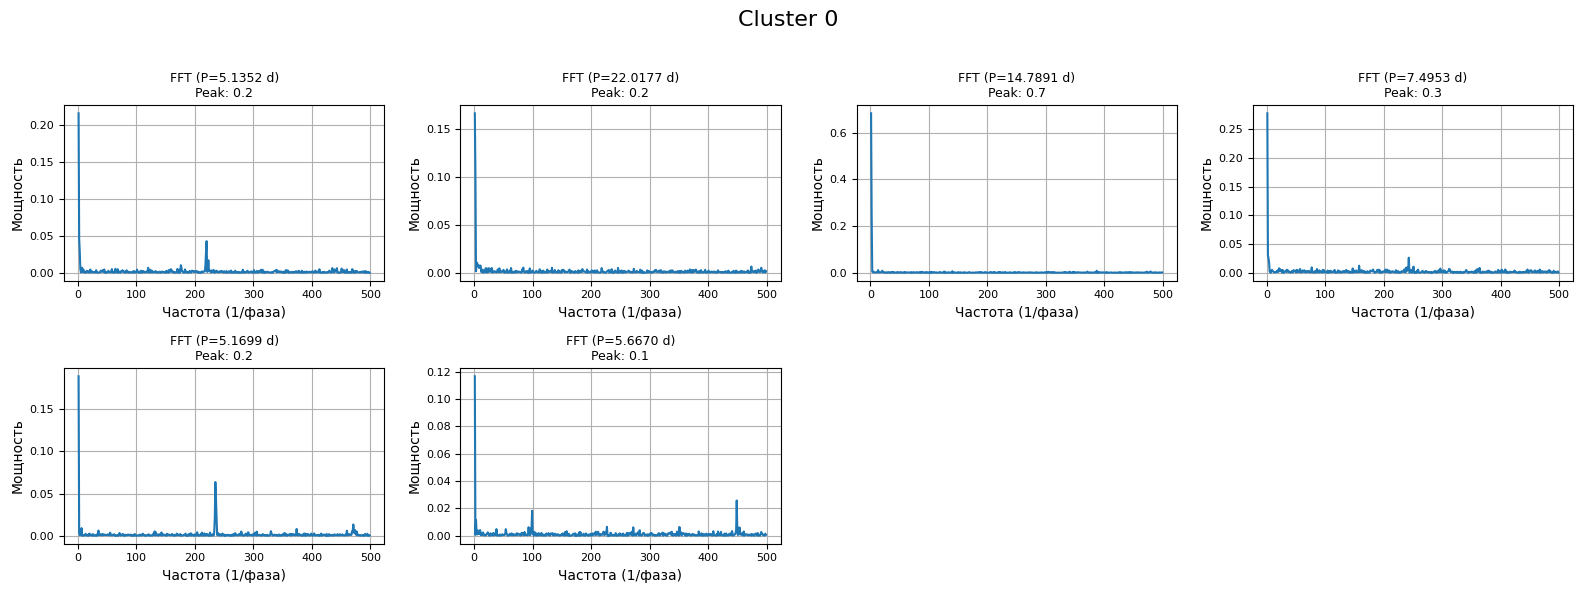

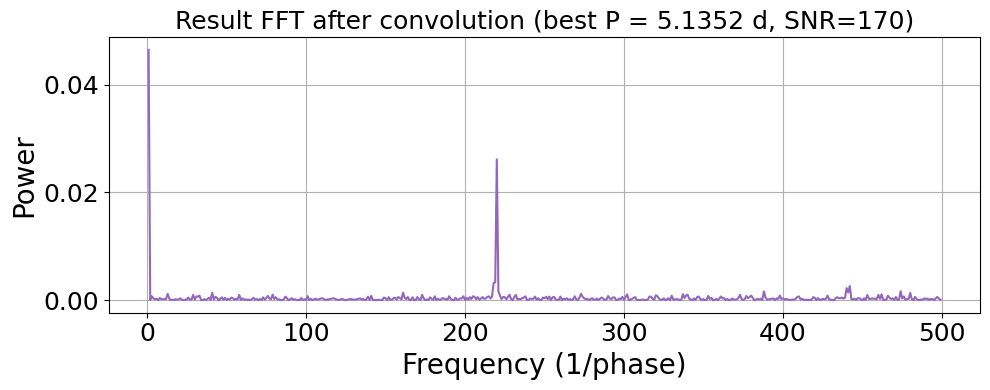

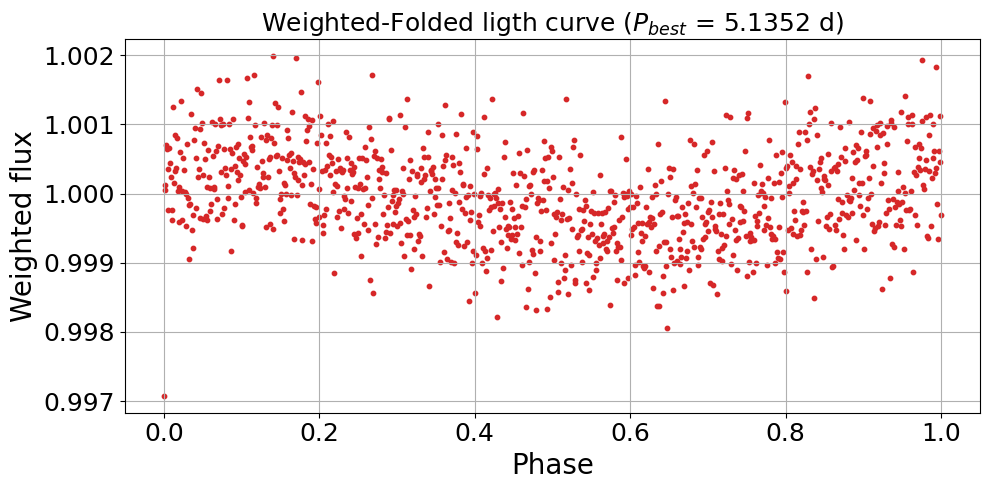

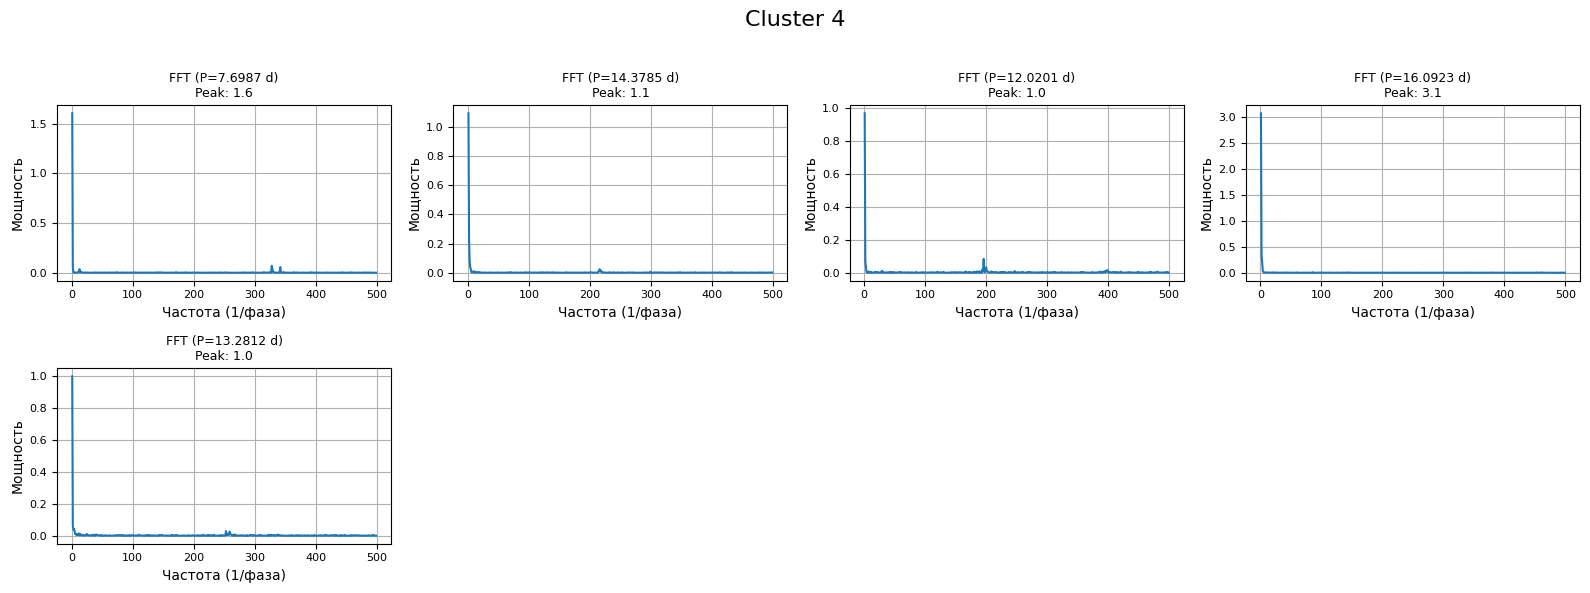

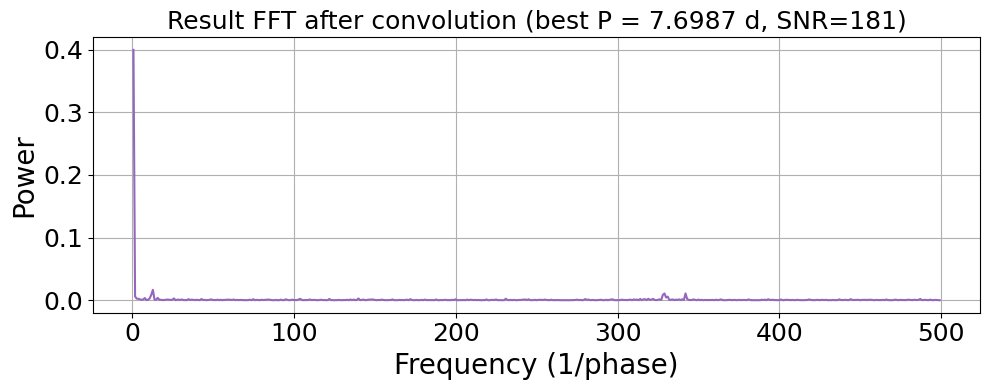

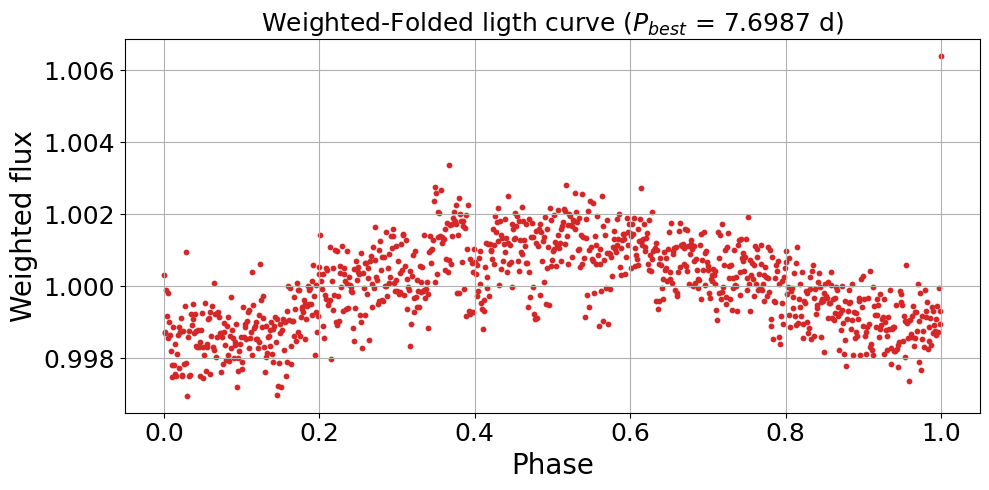

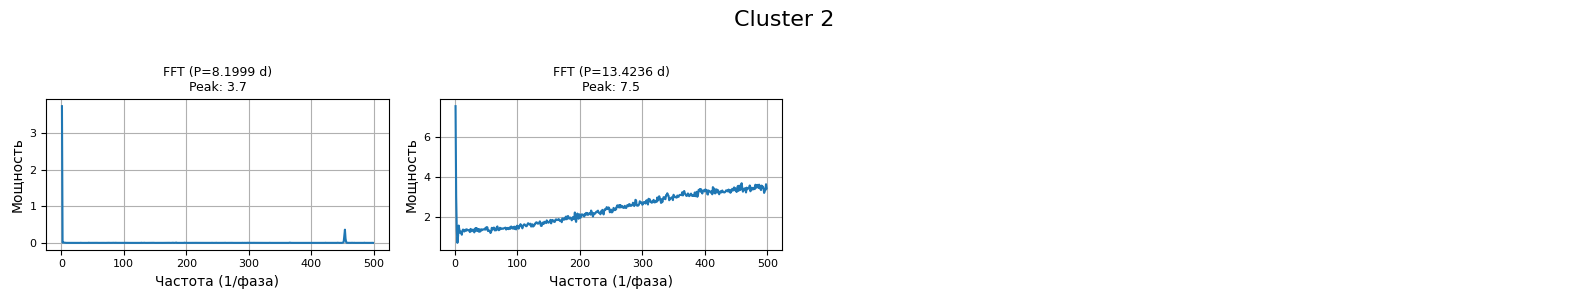

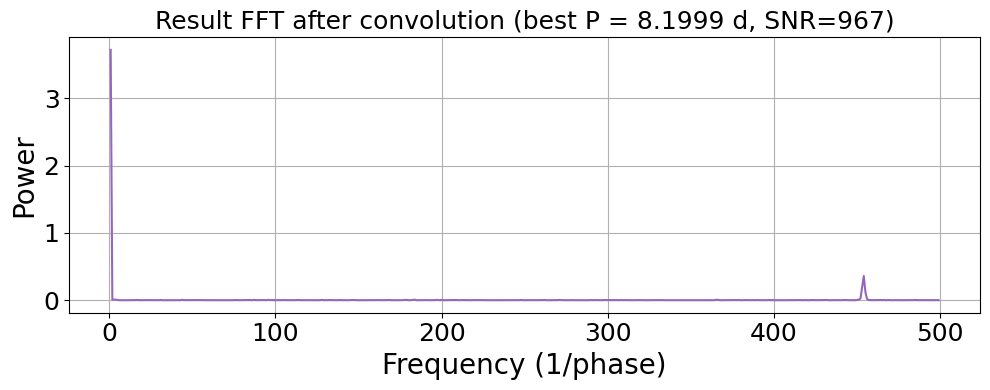

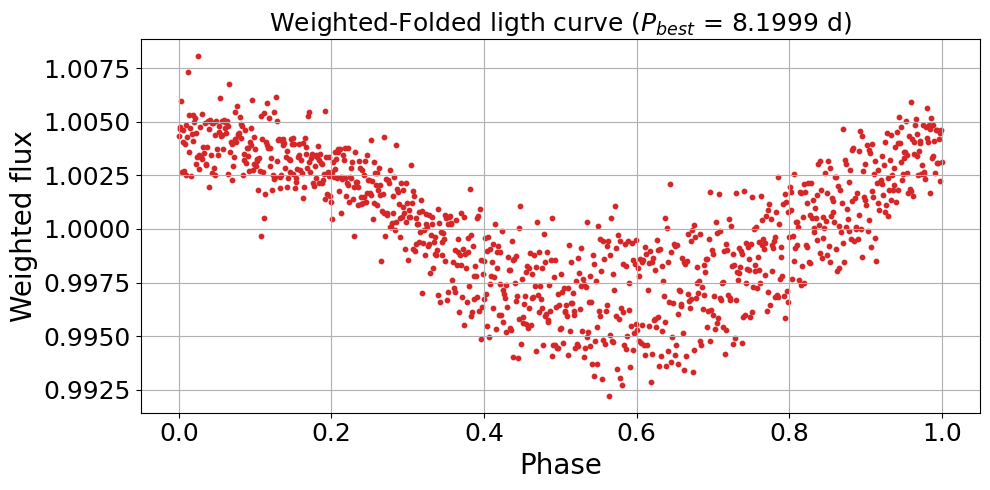

In [87]:
# Основной цикл по кластерам

weighted_cluster_lc = {clu: {} for clu in periods_labels.keys()}
weighted_fluxes = []
result_periods, result_snrs = [], []

for cluster_id in list(periods_labels.keys()):
    lc_indices = [i for i in range(len(y)) if y[i] == cluster_id]
    n = len(lc_indices)

    cols = 4
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharex=False)
    fig.suptitle(f'Cluster {cluster_id}', fontsize=16)
    axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

    selected_lcs = []
    weights = []
    candidate_periods = []

    for i, idx in enumerate(lc_indices):
        lc_clean = lcf[idx].remove_nans().remove_outliers(sigma=3).normalize()
        period = periods_labels[cluster_id][i]  # предполагается, что это словарь {idx: [перечень периодов]}

        freqs, power = apply_fft_to_phased_lc(lc_clean, period=period)
        is_significant, peak_value, background_value = find_significant_peak(freqs, power)

        if is_significant:
            selected_lcs.append(lc_clean)
            weights.append(peak_value / background_value)
            candidate_periods.append(period)

            axs[i].plot(freqs, power, color='tab:blue')
            axs[i].set_title(f'FFT (P={period:.4f} d)\nPeak: {peak_value:.1f}', fontsize=9)
            axs[i].tick_params(labelsize=8)
            axs[i].set_xlabel("Частота (1/фаза)")
            axs[i].set_ylabel("Мощность")
            axs[i].grid(True)
        else:
            axs[i].axis('off')

    for j in range(len(lc_indices), len(axs)):
        axs[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    if selected_lcs:
        best_period, best_score, best_flux, best_freqs, best_power = select_best_period_by_fft_weighted_combination(
            selected_lcs, weights, candidate_periods)

        # Отрисовка спектра мощности после объединения
        plt.figure(figsize=(10, 4))
        plt.tick_params(axis='both', labelsize=18)
        plt.plot(best_freqs, best_power, color='tab:purple')
        plt.title(f'Result FFT after convolution (best P = {best_period:.4f} d, SNR={best_score:.0f})', fontsize=18)
        plt.xlabel('Frequency (1/phase)', fontsize=20)
        plt.ylabel('Power', fontsize=20)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        weighted_cluster_lc[cluster_id]["best_period"] = best_period
        weighted_cluster_lc[cluster_id]["best_freqs"] = best_freqs
        weighted_cluster_lc[cluster_id]["best_power"] = best_power

        # Отрисовка взвешенной свёртки
        phase_grid = np.linspace(0, 1, 1000)
        plt.figure(figsize=(10, 5))
        plt.scatter(phase_grid, best_flux, color='tab:red', s=10)
        plt.tick_params(axis='both', labelsize=18)
        plt.title('Weighted-Folded ligth curve ($P_{best}$ = ' + f'{best_period:.4f} d)', fontsize=18)
        plt.xlabel('Phase', fontsize=20)
        plt.ylabel('Weighted flux', fontsize=20)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        weighted_cluster_lc[cluster_id]["phase_grid"] = phase_grid
        weighted_cluster_lc[cluster_id]["best_flux"] = best_flux
        weighted_fluxes.append(best_flux)

        result_periods.append(best_period)
        result_snrs.append(best_score)


In [85]:
import numpy as np
from sklearn.cluster import DBSCAN

# Твои данные
periods = np.array(result_periods)
snrs = np.array(result_snrs)

# Кластеризация периодов: eps — максимальная разница между близкими периодами
X = periods.reshape(-1, 1)
clustering = DBSCAN(eps=0.3, min_samples=1).fit(X)
labels = clustering.labels_

# Подсчёт по кластерам
votes = []
for label in np.unique(labels):
    idx = np.where(labels == label)[0]
    mean_period = np.mean(periods[idx])
    total_snr = np.sum(snrs[idx])
    votes.append((mean_period, total_snr, len(idx)))

# Выбор победителя
res_period, res_score, count = max(votes, key=lambda x: (x[2], x[1]))  # сначала по количеству, потом по сумме SNR

print(f"🏁 Выбранный период: {res_period:.5f} дней")
print(f"↳ Голосов: {count}, Суммарный SNR: {res_score:.2f}")


🏁 Выбранный период: 8.19989 дней
↳ Голосов: 1, Суммарный SNR: 966.70


### Корреляция взвещшенных кривых блеска из разных кластеров

In [227]:
import numpy as np
from scipy.signal import correlate, correlation_lags
from scipy.stats import pearsonr

def analyze_phase_correlations(weighted_fluxes):
    """
    weighted_fluxes: list of 1D numpy arrays (взвешенные кривые блеска)
    """
    n = len(weighted_fluxes)
    corr_matrix = np.zeros((n, n))
    lag_matrix = np.zeros((n, n), dtype=int)
    pearson_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
    
            flux1 = (weighted_fluxes[i] - np.mean(weighted_fluxes[i])) / np.std(weighted_fluxes[i])
            flux2 = (weighted_fluxes[j] - np.mean(weighted_fluxes[j])) / np.std(weighted_fluxes[j])

            corr = correlate(flux1, flux2, mode='full')
            norm = np.linalg.norm(flux1) * np.linalg.norm(flux2)
            corr /= norm

            lag = correlation_lags(len(flux1), len(flux2), mode='full')[np.argmax(corr)]
            max_corr = np.max(corr)

            # Сдвигаем flux2 на найденный лаг
            flux2_shifted = np.roll(weighted_fluxes[j], lag)
            r, _ = pearsonr(weighted_fluxes[i], flux2_shifted)

            corr_matrix[i, j] = max_corr
            lag_matrix[i, j] = lag
            pearson_matrix[i, j] = r

    return corr_matrix, lag_matrix, pearson_matrix

corr_matrix, lag_matrix, pearson_matrix = analyze_phase_correlations(weighted_fluxes)

print("Корреляция:")
print(np.round(corr_matrix, 3))

print("Сдвиги по фазе:")
print(lag_matrix)

print("Коэффициенты Пирсона:")
print(np.round(pearson_matrix, 3))


Корреляция:
[[1.    0.184 0.2   0.284]
 [0.184 1.    0.643 0.388]
 [0.2   0.643 1.    0.372]
 [0.284 0.388 0.372 1.   ]]
Сдвиги по фазе:
[[   0  468  436   22]
 [-468    0   -5  468]
 [-436    5    0 -341]
 [ -22 -468  341    0]]
Коэффициенты Пирсона:
[[1.    0.294 0.306 0.293]
 [0.294 1.    0.651 0.567]
 [0.306 0.651 1.    0.513]
 [0.293 0.567 0.513 1.   ]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks

# Функция для извлечения признаков из кривых блеска
def extract_features(lc_collection):
    features = []
    for lc in lc_collection:
        # Нормализация и очистка данных
        lc_clean = lc.remove_nans().remove_outliers(sigma=3).normalize()
        
        # Извлекаем несколько признаков:
        mean_flux = np.mean(lc_clean.flux)
        std_flux = np.std(lc_clean.flux)
        max_flux = np.max(lc_clean.flux)
        min_flux = np.min(lc_clean.flux)
        amplitude = np.max(lc_clean.flux) - np.min(lc_clean.flux)
        #skewness = skew(lc_clean.flux)
        #kurt = kurtosis(lc_clean.flux)
        #peaks, _ = find_peaks(lc_clean.flux)
        #peak_times = lc_clean.time[peaks]
        #time_between_peaks = np.diff(peak_times).mean() if len(peak_times) > 1 else 0
        
        # Добавляем признаки в список
        features.append([mean_flux, std_flux, max_flux, min_flux, amplitude])
    
    return np.array(features)

# Извлекаем фичи для всех кривых блеска
features_list = extract_features(lcf)

# Преобразуем в массив NumPy
X = np.array(features_list)

# Создаем RandomForest для оценки важности фич
rf = RandomForestClassifier(n_estimators=100)

# Применяем кросс-валидацию для оценки модели
cross_val_scores = cross_val_score(rf, X, y, cv=5)  # Где y - это целевые метки кластеров

# Оценка важности фичей
rf.fit(X, y)
importances = rf.feature_importances_

# Сортируем фичи по важности
feature_names = ['Mean Flux', 'Std Flux', 'Max_flux', 'Min_flux', 'Amplitude']
sorted_indices = np.argsort(importances)[::-1]

# Выводим важность фичей
print("Feature Importance:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]}")